In [110]:
import numpy as np
import pickle
import os
from scipy.stats import norm
# Plotting
import matplotlib.pyplot as plt

In [111]:
def rlba(v = np.array([1, 1]), 
         A = 1, 
         b = 1.5, 
         s = 0.1,
         n_samples = 1000):
    rts = np.zeros((n_samples, 1))
    choices = np.zeros((n_samples, 1))
    
    n_choices = len(v)
    for i in range(n_samples):
        d = np.array([-0.1]*n_choices)
        while np.max(d) < 0:
            k = np.random.uniform(low = 0, high = A, size = n_choices)
            d = np.random.normal(loc = v, scale = s)
            tmp_rt = (b - k) / d
        
        rts[i] = np.min(tmp_rt)
        choices[i]  = np.argmin(tmp_rt)
    
    # Create some dics
    v_dict = {}
    for i in range(n_choices):
        v_dict['v_' + str(i)] = v[i]

    return (rts, choices, {**v_dict,
                           'A': A,
                           'b': b,
                           's': s,
                           'delta_t': 0,
                           'max_t': 1000,
                           'n_samples': n_samples,
                           'simulator': 'lba',
                           'boundary_fun_type': 'none',
                           'possible_choices': [i for i in range(n_choices)]})

In [121]:
def dlba(rt = 0.5, 
         choice = 0,
         v = np.array([1, 1]),
         A = 1,
         b = 1.5,
         s = 0.1,
         return_log = True):
    n_choices = len(v)
    l_f_t = 0
    

    for i in range(n_choices):
        if i == choice:
            tmp = flba(rt = rt, A = A, b = b, v = v[i], s = s)
            if tmp < 1e-29:
                tmp = 1e-29
            l_f_t += np.log(tmp)
        else:
            tmp = Flba(rt = rt, A = A, b = b, v = v[i], s = s)
            
            # numerical robustness catches
            if tmp < 1e-29:
                tmp = 1e-29
            if tmp > (1.0 - 1e-29):
                tmp = (1.0 - 1e-29)
            l_f_t += np.log(1.0 - tmp)
            
    if return_log: 
        return l_f_t
    else:
        return np.exp(l_f_t)

In [206]:
def Flba(rt = 0.5, 
         v = 1,
         A = 1,
         b = 1.5,
         s = 0.1):
    return (1 + ((1 / A) * ((b - A - (rt * v)) * norm.cdf((b - A - (rt * v)) / (rt * s)) - \
        (b - (rt * v)) * norm.cdf((b - (rt * v)) / (rt * s)) + \
                    (rt * s) * (norm.pdf((b - A - (rt * v)) / (rt * s)) - norm.pdf((b - (rt * v)) / (rt * s))))))

In [207]:
def flba(rt = 0.5, 
         v = 1,
         A = 1,
         b = 1.5,
         s = 0.1):
    return ((1 / A) * ( (-v) * norm.cdf((b - A - (rt * v)) / (rt * s)) + \
                     s * norm.pdf((b - A - (rt * v)) / (rt * s)) + \
                     v * norm.cdf((b - (rt * v)) / (rt * s)) + \
                     (-s) * norm.pdf((b - (rt * v)) / (rt * s)) ))

In [216]:
# import lba
import lba
out = lba.rlba(n_samples = 20000, v = np.array([1.82, 1.36]), b = 1.924838, A = 0.174121, s = 0.128904)

#out = rlba(n_samples = 20000, v = np.array([1.5, 1.]), b = 2, A = 1, s = 0.1)

In [217]:
out[0][out[1] == 0] = out[0][out[1] == 0] * -1

In [77]:
import pickle
out = pickle.load(open('/media/data_cifs/afengler/tmp/lba_8085c794bf7a11e9b003530bce13c5b4.pickle', 'rb'))

In [214]:
out[0][out[1] == 0] = out[0][out[1] == 0] * (-1)

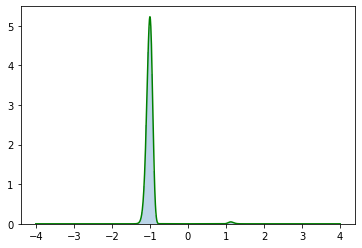

In [218]:
plt.hist(out[0], bins = 50, density = True, alpha = 0.3)
plt.plot(-my_grid, np.exp(f_test_vals[:, 0]), color = 'green')
plt.plot(my_grid, np.exp(f_test_vals[:, 1]), color = 'green')

In [203]:
my_grid = np.linspace(0.01, 4.0, 1000)

In [213]:
f_test_vals = np.zeros((len(my_grid),2))
for c in range(2):
    cnt = 0
    for i in my_grid:
        f_test_vals[cnt, c] = dlba(rt = i, choice = c, 
                                   v = np.array([1.82, 1.36]), 
                                   b = 1.924838, 
                                   A = 0.174121, 
                                   s = 0.128904, 
                                   return_log = True)
        cnt += 1

/home/afengler/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


In [54]:
[i for i in range(4)]

[0, 1, 2, 3]

In [69]:
out

(array([[0.6368266 ],
        [0.6662889 ],
        [0.59495118],
        ...,
        [0.35798089],
        [0.57274787],
        [1.03822317]]), array([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]]), {'v_0': 1.5,
  'v_1': 1.0,
  'A': 1,
  'b': 1.5,
  's': 0.1,
  'delta_t': 0,
  'max_t': 1000,
  'n_samples': 20000,
  'simulator': 'lba',
  'boundary_fun_type': 'none',
  'possible_choices': [0, 1]})